# <div align="center"> Análisis de KPIs para Universidades del grupo G 📊</div>
#### <div align="center"> Facultad Latinoamericana De Ciencias Sociales & Universidad J. F. Kennedy</div>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set2"))

df_flcs = pd.read_csv('../datasets/GGFLCienciasSociales_process.txt', encoding='utf8', index_col=0)
df_uk = pd.read_csv('../datasets/GGUKennedy_process.txt', encoding='utf8', index_col=0)
#df_flcs['career'] = df_flcs['career'].map(lambda x: x.strip())
#df_uk['career'] = df_uk['career'].map(lambda x: x.strip())

## 1. Descripción general de los datasets

In [19]:
FLCS = 'Facultad Lat. de Ciencias Sociales'
UK = 'Universidad Kennedy'
display('Los datasets a analizar son de las universidades:')
display(f'   - {FLCS} (FLACSO) con {df_flcs.shape[0]} observaciones.')
display(f'   - {UK} (UK) con {df_uk.shape[0]} observaciones.')
display(f'Entre ambos totalizan {df_flcs.shape[0] + df_uk.shape[0]} filas y contienen {df_flcs.shape[1]} columnas: {", ".join(list(df_flcs.columns))}')

'Los datasets a analizar son de las universidades:'

'   - Facultad Lat. de Ciencias Sociales (FLACSO) con 1907 observaciones.'

'   - Universidad Kennedy (UK) con 1816 observaciones.'

'Entre ambos totalizan 3723 filas y contienen 10 columnas: university, career, inscription_date, first_name, last_name, gender, age, location, email, postal_code'

## 2. Dimensiones univariantes
### 2.1. Carrera

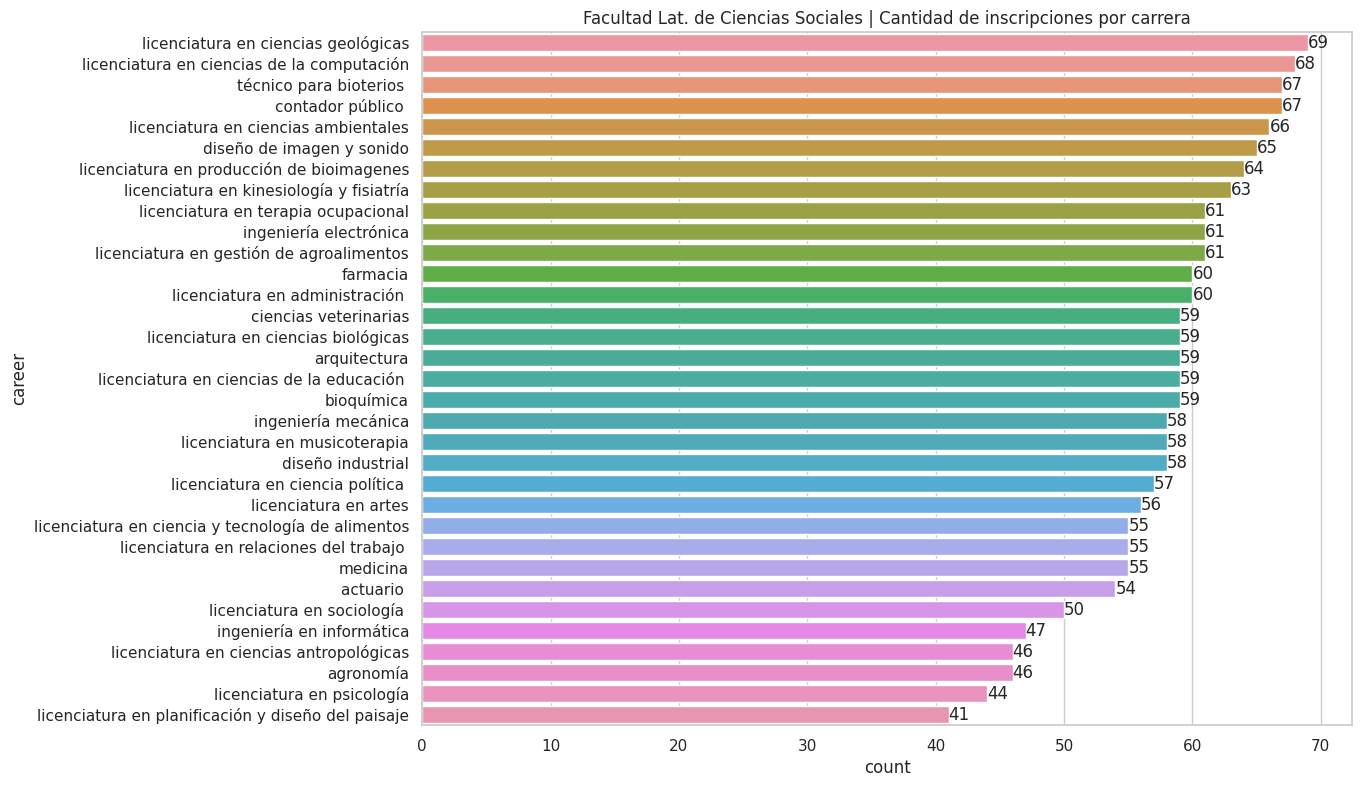

TypeError: bar_label() missing 1 required positional argument: 'container'

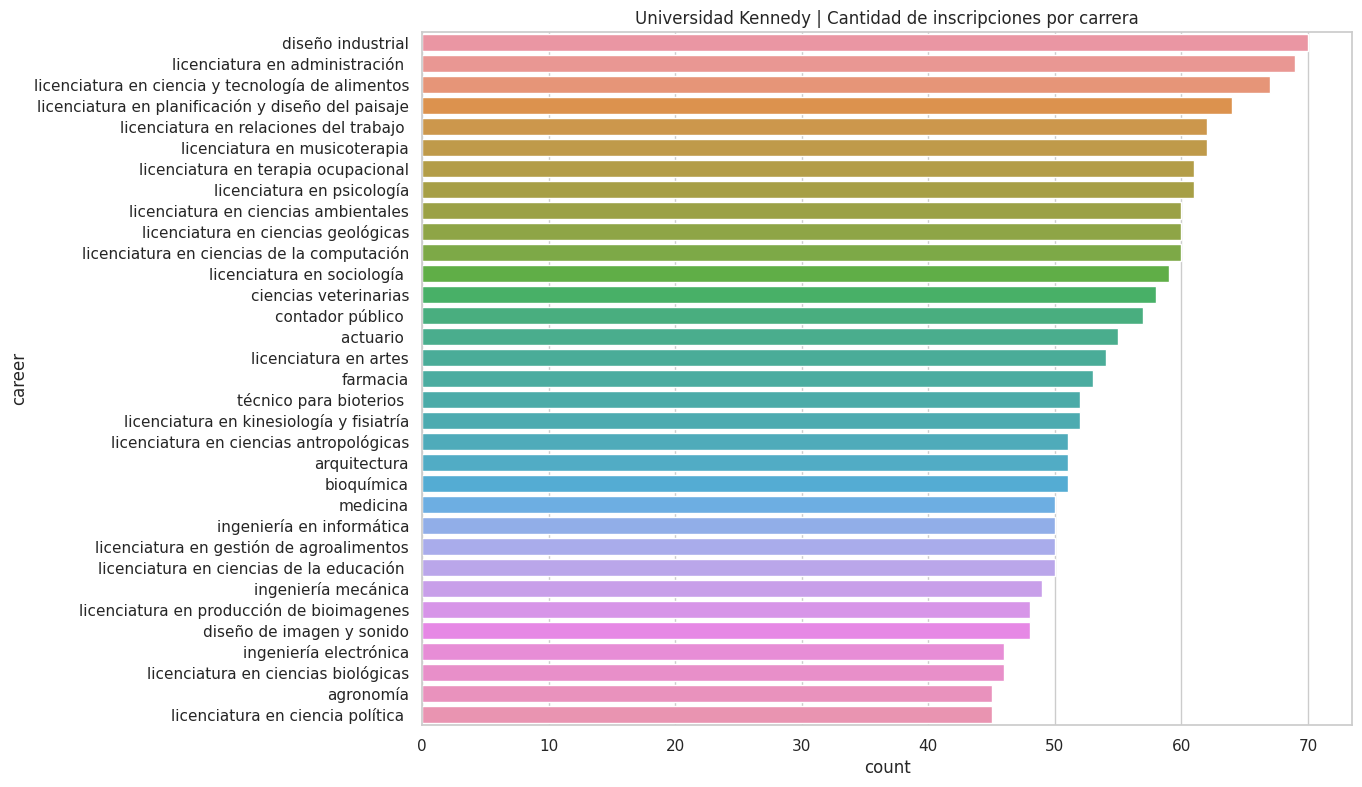

In [20]:
# Trabajar creando gráficos que expliquen las siguientes dimensiones: Carrera, Edad, Género, Localidad

# Carrera FLCS
plt.figure(figsize=(12,9))
plt.title(f'{FLCS} | Cantidad de inscripciones por carrera')
df_flcs_carrera = df_flcs[['career', 'university']].groupby('career').count().sort_values('university', ascending=False)
ax = sns.countplot(data=df_flcs, y='career', order=df_flcs_carrera.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# Carrera UK
plt.figure(figsize=(12,9))
plt.title(f'{UK} | Cantidad de inscripciones por carrera')
df_uk_carrera = df_uk[['career', 'university']].groupby('career').count().sort_values('university', ascending=False)
ax = sns.countplot(data=df_uk, y='career', order=df_uk_carrera.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

### 2.2 Edad

AttributeError: module 'seaborn' has no attribute 'pietplot'

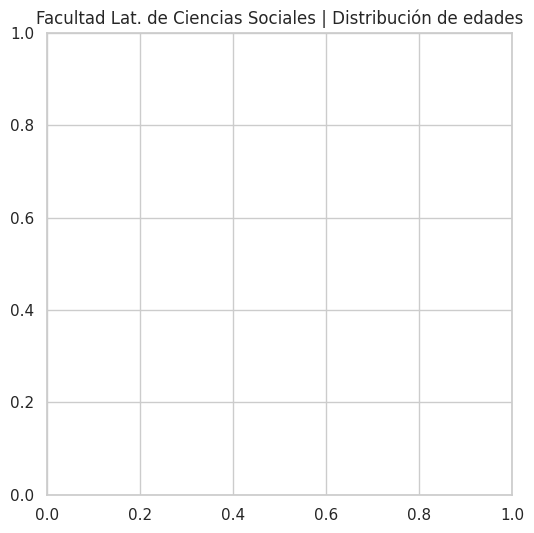

In [21]:
# Trabajar creando gráficos que expliquen las siguientes dimensiones: Carrera, Edad, Género, Localidad
# Edad FLCS
plt.figure(figsize=(6,6))
plt.title(f'{FLCS} | Distribución de edades')
df_flcs['age_group'] = pd.cut(df_flcs.age, bins=[15, 25, 35, 45, 55, 65, 200], right=True, 
                                            labels=['15-25', '25-35', '35-45', '45-55', '55-65', '+65'])
ax = sns.countplot(data=df_flcs, x='age_group')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# Edad UK
plt.figure(figsize=(6,6))
plt.title(f'{UK} | Distribución de edades')
df_uk['age_group'] = pd.cut(df_uk.age, bins=[15, 25, 35, 45, 55, 65, 200], right=True, 
                                            labels=['15-25', '25-35', '35-45', '45-55', '55-65', '+65'])
ax = sns.countplot(data=df_uk, x='age_group')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

### 2.3 Género

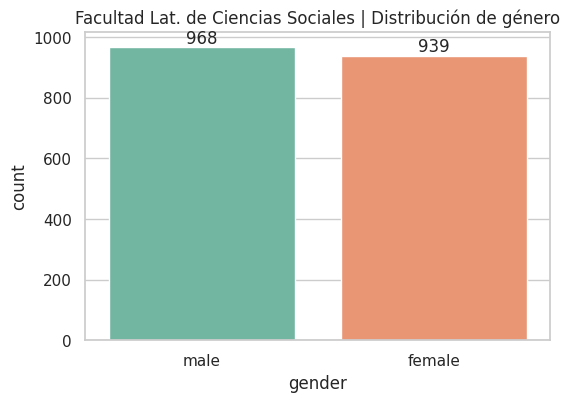

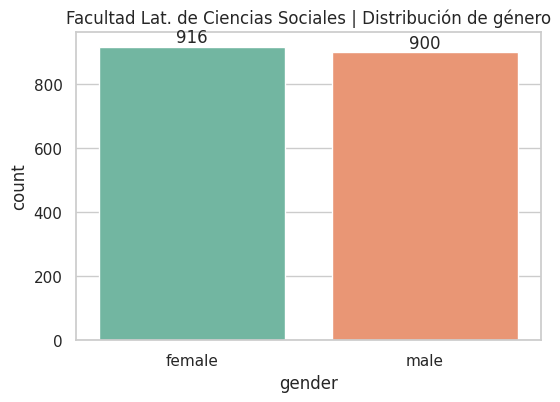

In [ ]:
# Trabajar creando gráficos que expliquen las siguientes dimensiones: Carrera, Edad, Género, Localidad
# Género FLCS
plt.figure(figsize=(6,4))
plt.title(f'{FLCS} | Distribución de género')
flcs = sns.countplot(data=df_flcs, x='gender')
flcs.bar_label(flcs.containers[0], label_type='edge')
plt.show()

# Género UK
plt.figure(figsize=(6,4))
plt.title(f'{FLCS} | Distribución de género')
uk = sns.countplot(data=df_uk, x='gender')
uk.bar_label(uk.containers[0], label_type='edge')
plt.show()

### 2.4 Localidad

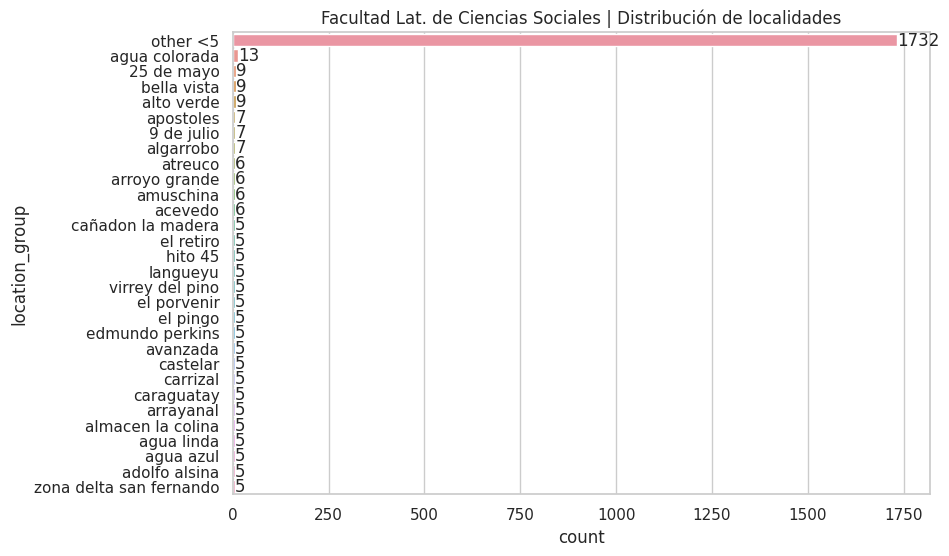

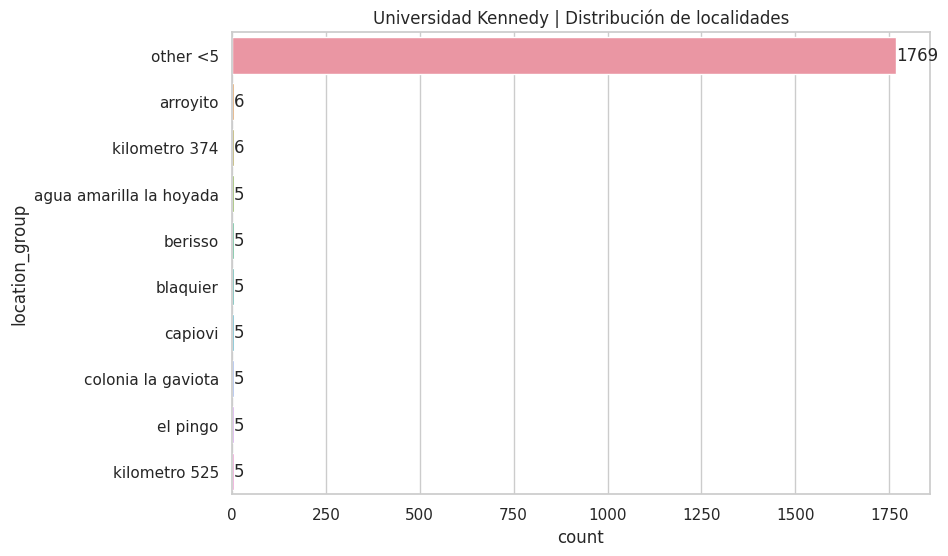

In [ ]:
# Trabajar creando gráficos que expliquen las siguientes dimensiones: Carrera, Edad, Género, Localidad
def count_location(row, locations):
    if row['location'] in locations:
        row['location_group'] = row['location']
    else:
        row['location_group'] = 'other <5'
    return row

# Localidad FLCS
plt.figure(figsize=(9,6))
plt.title(f'{FLCS} | Distribución de localidades')
df_flcs_location_count = df_flcs[['location', 'university']].groupby('location').count().sort_values(by='university', ascending=False)
big_locations = list(df_flcs_location_count[df_flcs_location_count['university'] >= 5].index)
df_flcs = df_flcs.apply(count_location, axis='columns', locations=big_locations)
df_flcs_location_group_count = df_flcs[['location_group', 'university']].groupby('location_group').count().sort_values(by='university', ascending=False).index
ax = sns.countplot(data=df_flcs, y='location_group', order=list(df_flcs_location_group_count))
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# Localidad UK
plt.figure(figsize=(9,6))
plt.title(f'{UK} | Distribución de localidades')
df_uk_location_count = df_uk[['location', 'university']].groupby('location').count().sort_values(by='university', ascending=False)
big_locations = list(df_uk_location_count[df_uk_location_count['university'] >= 5].index)
df_uk = df_uk.apply(count_location, axis='columns', locations=big_locations)
df_uk_location_group_count = df_uk[['location_group', 'university']].groupby('location_group').count().sort_values(by='university', ascending=False).index
ax = sns.countplot(data=df_uk, y='location_group', order=list(df_uk_location_group_count))
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()


## 3. Comparativo de inscripciones entre ambas universidades

In [ ]:
# Realizar un comparativo de inscripciones entre ambas universidades.
df_flcs_carreras_unique = list(df_flcs['career'].unique())
df_flcs_carreras_unique.sort(key=lambda x: x)
df_uk_carreras_unique = list(df_uk['career'].unique())
df_uk_carreras_unique.sort(key=lambda x: x)
df_both_carreras_unique = pd.DataFrame([z for z in zip(df_flcs_carreras_unique, df_uk_carreras_unique)], columns=['FLCS', 'UK'])
display('Ambas universidades tienen las mismas 33 carreras.')
df_both_carreras_unique


'Ambas universidades tienen las mismas 33 carreras.'

,FLCS,UK
0,actuario,actuario
1,agronomía,agronomía
2,arquitectura,arquitectura
3,bioquímica,bioquímica
4,ciencias veterinarias,ciencias veterinarias
5,contador público,contador público
6,diseño de imagen y sonido,diseño de imagen y sonido
7,diseño industrial,diseño industrial
8,farmacia,farmacia
9,ingeniería electrónica,ingeniería electrónica


### 3.1 Por carrera

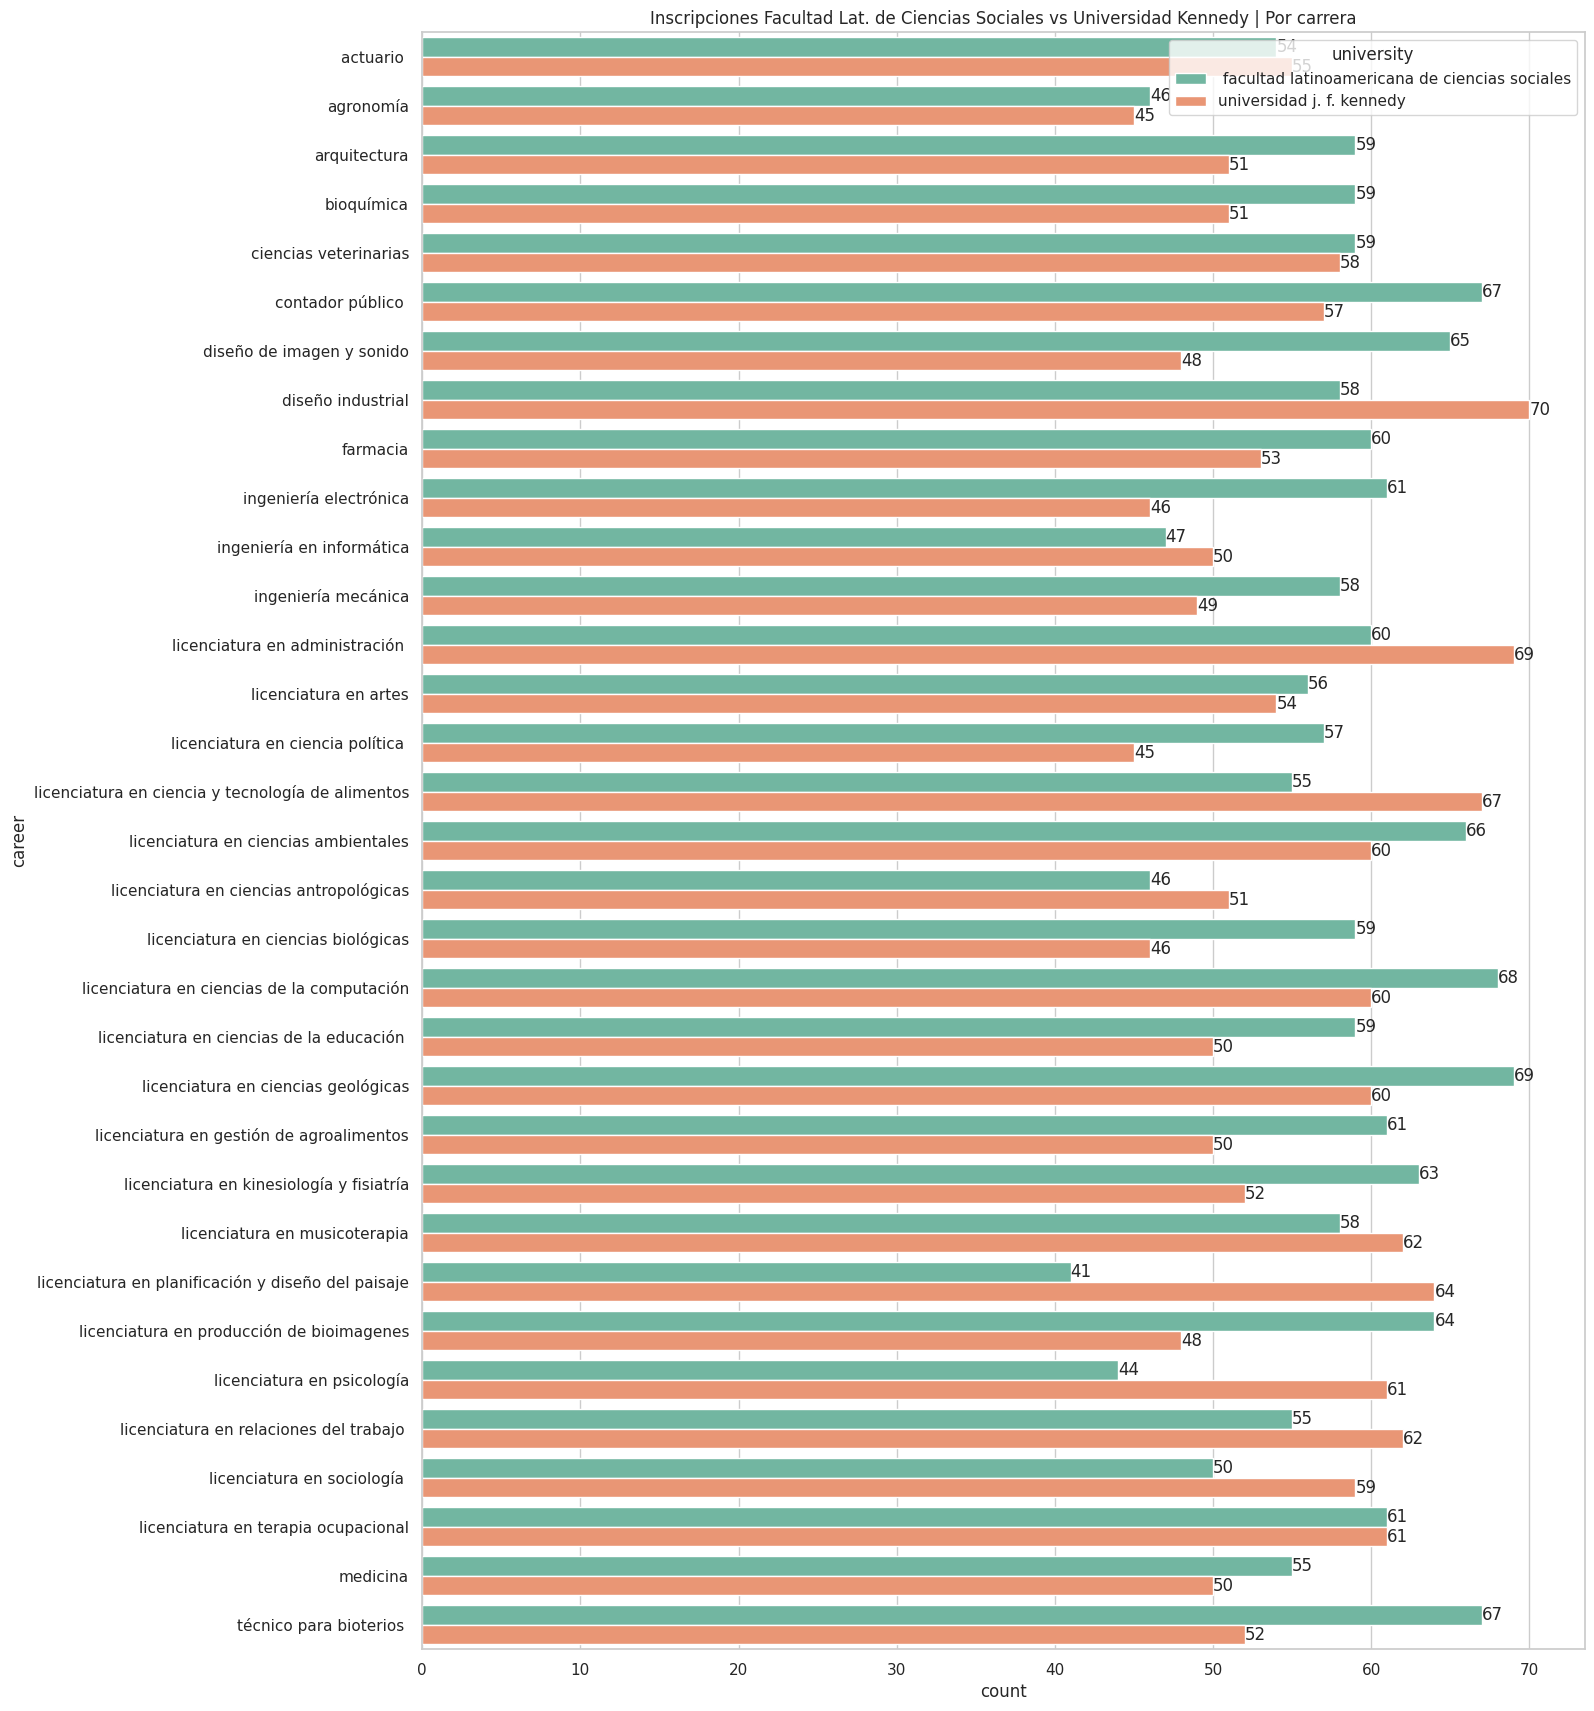

In [ ]:
# Realizar un comparativo de inscripciones entre ambas universidades.
plt.figure(figsize=(15,21))
plt.title(f'Inscripciones {FLCS} vs {UK} | Por carrera')
df_both = pd.concat([df_flcs, df_uk])
df_both_carrera = df_both[['career', 'university', 'last_name']].groupby(['career', 'university']).count().sort_values('last_name', ascending=False)
ax = sns.countplot(data=df_both, y='career', hue='university', order=df_flcs_carreras_unique)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

### 3.2 Por año de inscripción

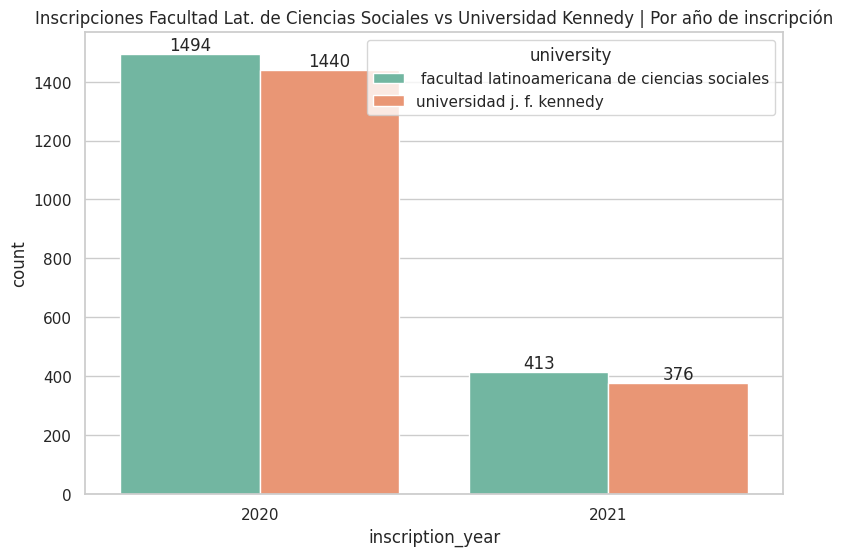

In [ ]:
# Realizar un comparativo de inscripciones entre ambas universidades.
plt.figure(figsize=(9,6))
plt.title(f'Inscripciones {FLCS} vs {UK} | Por año de inscripción')
df_both = pd.concat([df_flcs, df_uk])
df_both['inscription_date'] = pd.to_datetime(df_both['inscription_date'], format='%Y-%m-%d')
df_both['inscription_year'] = df_both['inscription_date'].map(lambda x: x.year)
ax = sns.countplot(data=df_both, x='inscription_year', hue='university')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

### 3.3 Por género

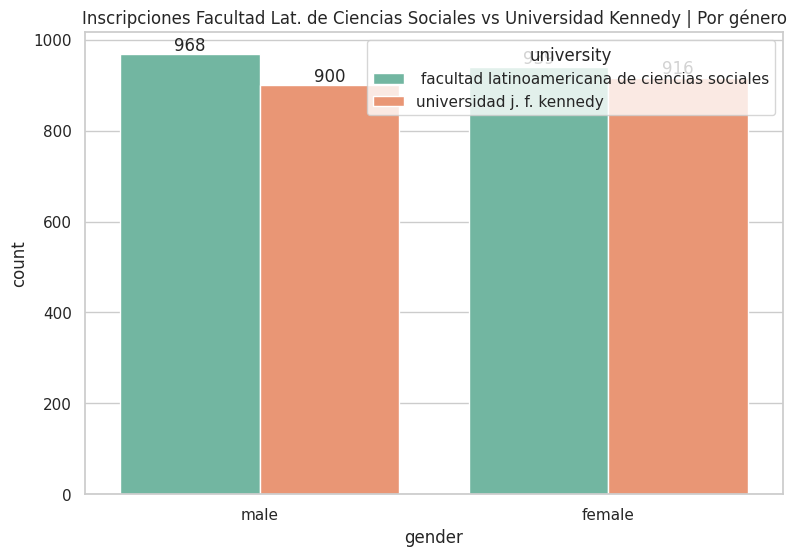

In [ ]:
# Realizar un comparativo de inscripciones entre ambas universidades.
plt.figure(figsize=(9,6))
plt.title(f'Inscripciones {FLCS} vs {UK} | Por género')
ax = sns.countplot(data=df_both, x='gender', hue='university')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

### 3.4 Por localidad

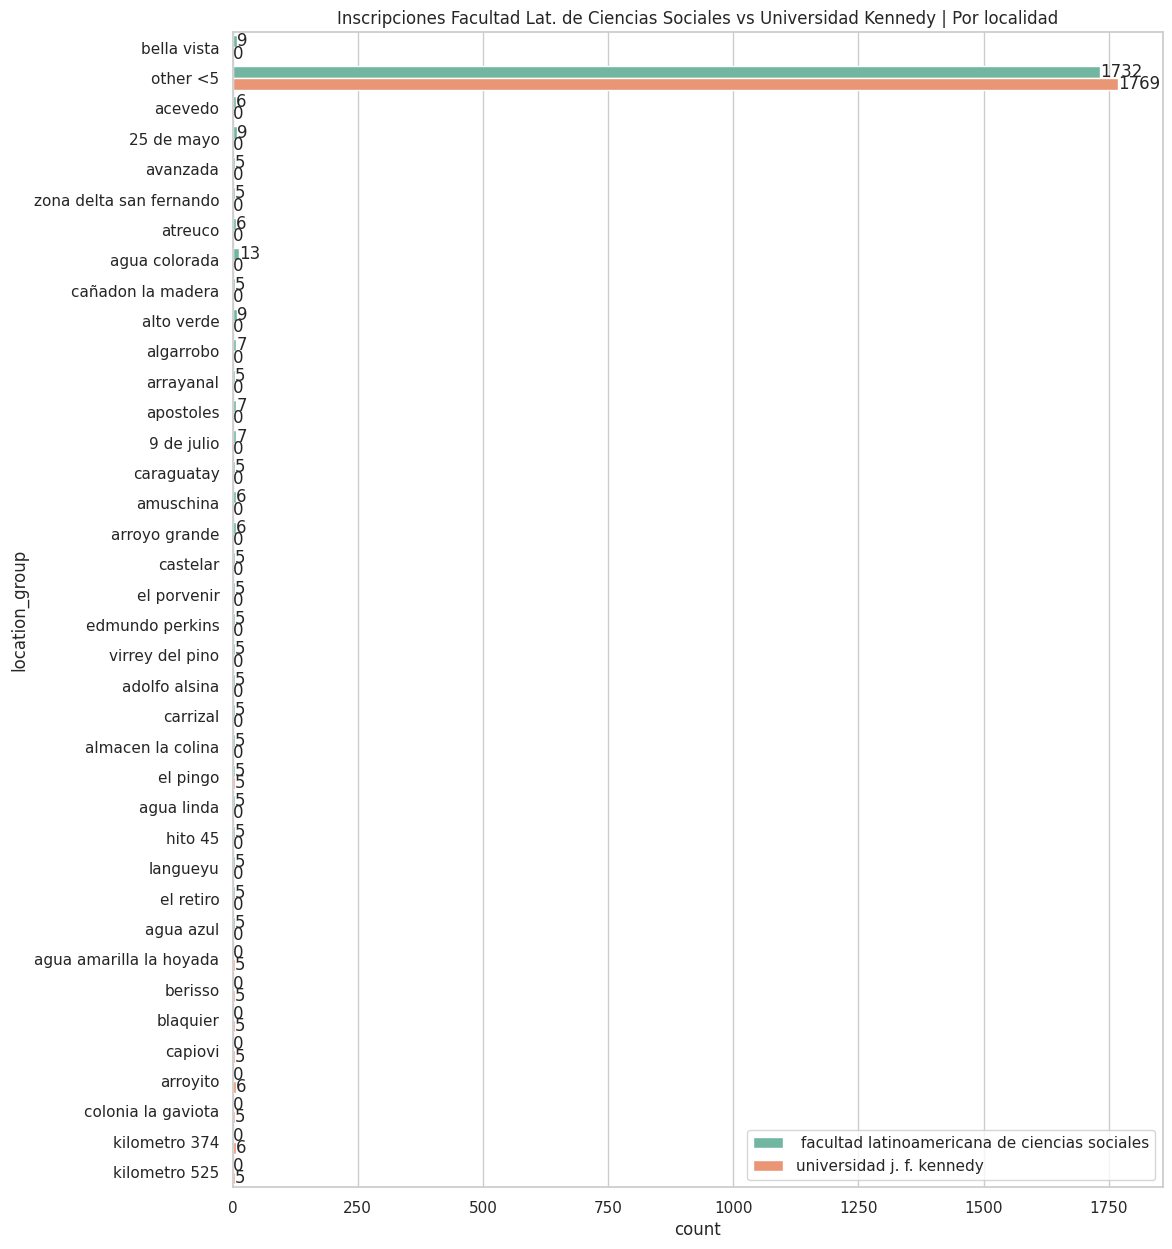

In [ ]:
# Localidades en ambas

plt.figure(figsize=(12,15))
#plt.legend(loc='lower right')
plt.title(f'Inscripciones {FLCS} vs {UK} | Por localidad')
df_loc_group_unique = list(df_both['location_group'].unique())
ax = sns.countplot(data=df_both, y='location_group', hue='university', order=df_loc_group_unique)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.legend(loc='lower right')
plt.show()

## 4. Correlaciones entre variables

In [ ]:
# Agrupar carreras
career_groups = pd.read_csv('../assets/career_groups.csv', encoding='utf8', )

df_flcs['career'] = df_flcs['career'].map(lambda x: x.strip())
df_flcs = pd.merge(df_flcs, career_groups, how='left', on='career')

df_uk['career'] = df_uk['career'].map(lambda x: x.strip())
df_uk = pd.merge(df_uk, career_groups, how='left', on='career')

### 4.1 Correlación entre carrera, edad y género (por universidad)

/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: User

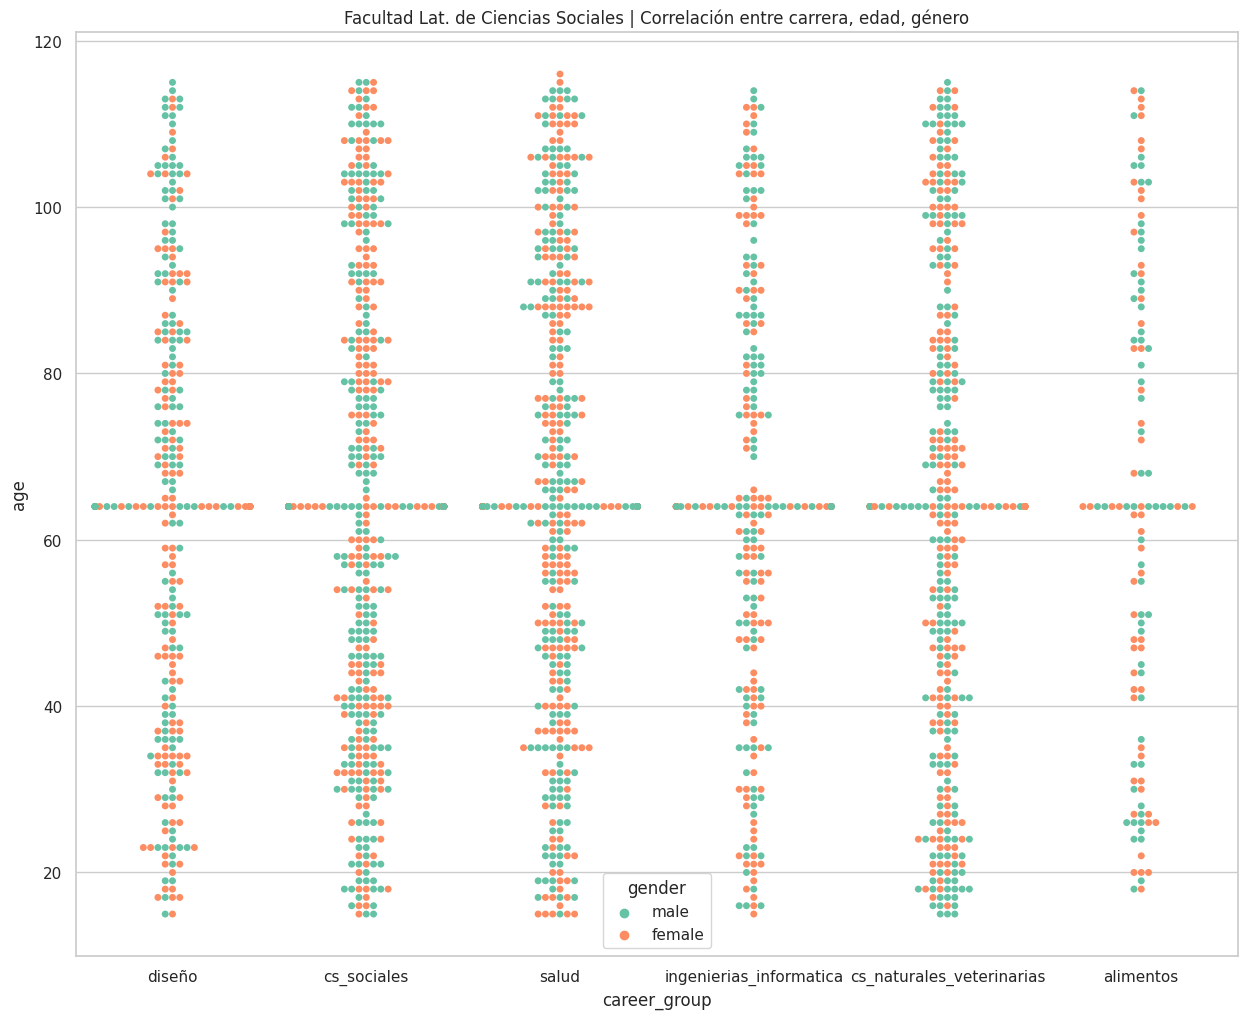

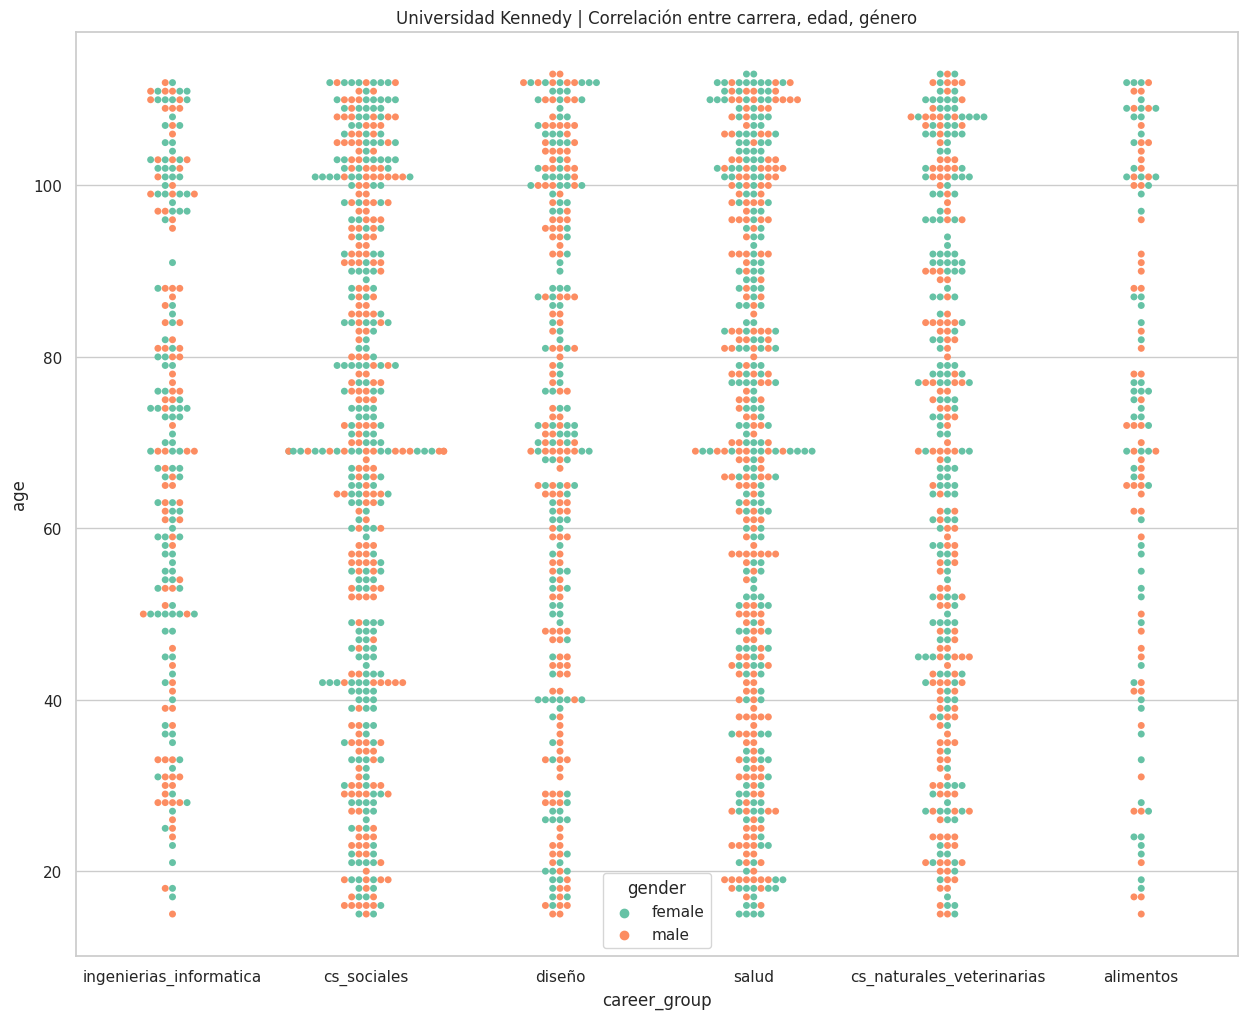

In [ ]:
# Analizar correlaciones de variables, entre: Carrera, edad, Género
# FLCS
plt.figure(figsize=(15,12))
plt.title(f'{FLCS} | Correlación entre carrera, edad, género')
flcs = sns.swarmplot(data=df_flcs, x='career_group', y='age', hue='gender')
plt.show()

plt.figure(figsize=(15,12))
plt.title(f'{UK} | Correlación entre carrera, edad, género')
uk = sns.swarmplot(data=df_uk, x='career_group', y='age', hue='gender')
plt.show()


### 4.2 Correlación entre edad, género y universidad

/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/leandro/.local/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


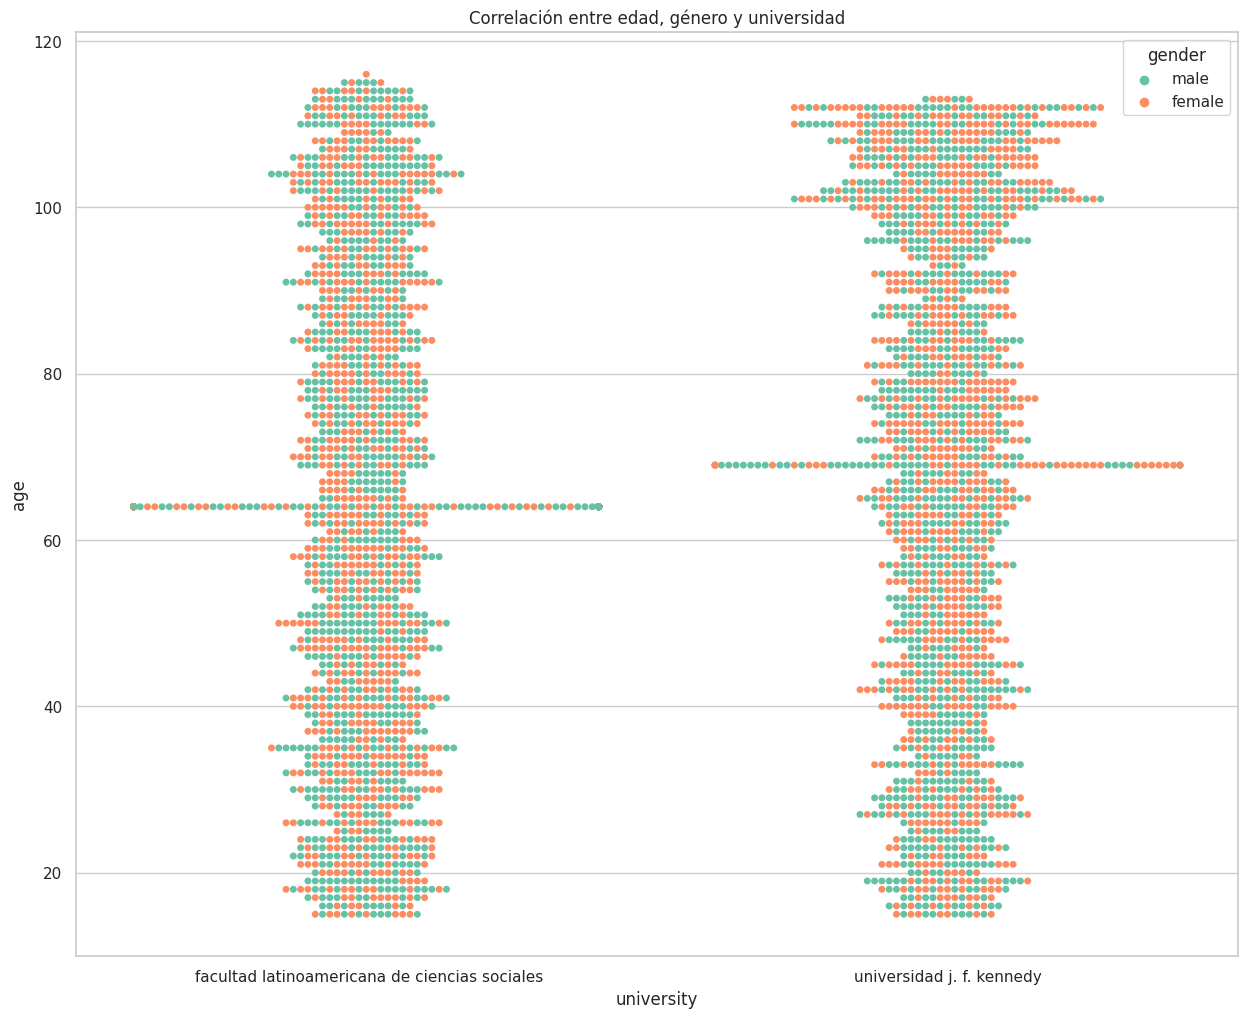

In [ ]:
# Comparar inscripciones por genero y edad entre ambas universidades

plt.figure(figsize=(15,12))
plt.title(f'Correlación entre edad, género y universidad')
sns.swarmplot(data=df_both, x='university', y='age', hue='gender')
plt.show()


## 5. Conclusiones

- Se analizaron datos de dos universidades: 'Facultad Latinoamericana de Cs Sociales' (FLACSO) y 'Universidad Kennedy' (UK), con un total de 3723 observaciones entre amabas. 
- Los datos que contiene cada observación son: career, inscription_date, first_name, last_name, gender, age, location, email, postal_code. 
- El análisis se centró en las inscripciones por carrera, edad y género. 

#### Dimensiones univariantes
- Si bien hay diferencia en el **número de inscriptos por carrera**, no se observan variaciones extremas en ninguna de las dos universidades. Los máximos y mínimos van de 69 a 41 para FLACSO y 45 a 70 para UK. Dentro de esos límites la variación es uniforme.


- Para analizar la **edad**, se realizaron rangos de 10 años, comenzando en 15 hasta 65, y luego se agruparon los > 65. 
  - En el caso de la FLACSO se observa que el 50% de los inscriptos son mayores de 65 años. El 2do grupo mayoritario, con 20% del total es de 55 a 65 años. 
  - En el caso de la UK, se ven resultados similares, más del 50% corresponde a personas mayores de 65 años, y el 2do grupo mayoritario es el de 55-65.
  - Estas distribuciones pueden deberse a errores en los datos. 


- En el caso del **género**, la proporción es aprox. 50/50 para los géneros masculino y femenino en ambas universidades. Hay que tener en cuenta que esas son las únicas opciones posibles y no se registran datos sobre géneros no binarios. 


- En el caso de las **localidades**, los datos son muy dispersos para ambos casos. Es decir, hay muy poca cantidad de inscriptos que provengan de una misma localidad. 
  - Para graficar, se conservaron de forma individual las localidades con más de 5 inscriptos y se agruparon todas las restantes. 
  - En ambos casos, el 90% de los alumnos vienen de localidades con menos de 5 inscripciones. 
  - Para la FLACSO, la localidad con máximos inscriptos es *Aguas Coloradas* y tiene 13 alumnos.
  - Para la UK, la localidad con máximos inscriptos son *Arroyito* y *Km 374*, con 6 alumnos cada una. 

#### Comparación entre inscripciones por universidad

- En el dataset se cuentan con las mismas 33 carreras para ambas universidades.

- No se observan grandes variaciones entre inscriptos por carrera entre universidades. La mayor diferencia es para *Licenciatura en Planificación y Diseño del Paisaje* con 23 inscriptos de diferencia. Pero para la mayoría de las carreras, la diferencia es de aprox. 10 alumnos.

- Con respecto al año de inscripción, tienen un conteo similar en ambos años, con aprox. un 75% de inscriptos en el 2020 y solo un 25% en el año 2021.

- Si se compara en base al género, se observa que en ambas universidades hay una distribución casi idéntica, que a su vez como ya se mencionó, corresponde aprox. a un 50/50 de femenino/masculino.

- Con respecto a la localidad, solo hay 1 localidad con más de 5 inscriptos para ambas universidades.
  - Sería interesante agrupar las localidades por departamento, partidos o zonas para pode realizar un análisis más detallado.

#### Análisis de correlación

- Para analizar la relación entre variables se agruparon las carreras en 7 grupos: 

- Realizando un diagrama de dispersión entre carrera, edad y género para FLACSO se observa que:
  - Hay una acumulación de inscriptos para todos los grupos de carreras con edad aprox. 65 años.
  - No hay una preferencia pronunciada de grupo de carrera por género. 
  - Los grupos de carreras con más inscriptos son los de: cs_sociales, cs_naturales_veterinarias y salud
    - Hay que tener en cuenta que no todos los grupos de carreras cuentan con la misma cantidad de carerras


- Realizando un diagrama de dispersión entre carrera, edad y género para UK se observa que:
  - Hay una acumulación de inscriptos para todos los grupos de carreras con edad aprox. 70 años.
  - Hay un aumento de inscriptos para todos los grupos de carreras con edad +90 años.
  - No hay una preferencia pronunciada de grupo de carrera por género. 
  - Los grupos de carreras con más inscriptos son los de: cs_sociales y cs_naturales_veterinarias
    - Hay que tener en cuenta que no todos los grupos de carreras cuentan con la misma cantidad de carerras

- Realizando un diagrama de dispersión entre edad, género y universidad se observa que:
  - No hay una preferencia pronunciada de grupo de carrera por género. 
  - La cantidad de inscriptos en general es muy similar